In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

2025-09-03 21:46:20.897721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756935981.290648      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756935981.404336      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
df.sample(10)

,review,sentiment
37449,Nico Mastorakis's banned movie was quite disap...,negative
2822,"Is this a good movie? No, certainly not. But f...",positive
16184,"Wow, this film was just bloody horrid. SO bad ...",negative
12413,"""Pixote: A Lei do Mais Fraco"" deals with what ...",positive
33022,Terrific little film that stars Mary Astor as ...,positive
3948,This mess starts off with a real tank running ...,negative
6877,It is a pity that you cannot vote zero stars o...,negative
36478,Bloody Birthday is a totally rubbish slasher m...,negative
968,This is a great film. Touching and strong. The...,positive
18870,"Yes, MTV there really is a way to market Daria...",negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

<Axes: xlabel='sentiment'>

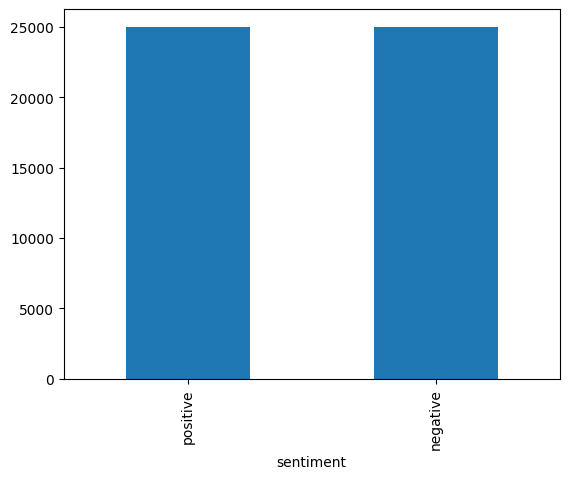

In [8]:
df['sentiment'].value_counts().plot(kind='bar')

In [9]:
df['label']=df['sentiment']

In [10]:
df=df.drop(['sentiment'],axis=1)

In [11]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [12]:
df

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [13]:
df['review'] = df['review'].str.lower()


In [14]:
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

df['review'] = df['review'].apply(remove_html)


In [15]:
def clean_text(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)   # Keep only alphabets

df['review'] = df['review'].apply(clean_text)


In [16]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df['review'] = df['review'].apply(remove_stopwords)


In [17]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['review'] = df['review'].apply(lemmatize_text)


In [18]:
# 1) Force correct dtypes
x = df['review'].astype(str).reset_index(drop=True)     # RAW TEXT ONLY
y = pd.Series(df['label']).astype(int).reset_index(drop=True)

In [19]:
x

0        one reviewer mentioned watching oz episode hoo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 50000, dtype: object

In [20]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: label, Length: 50000, dtype: int64

In [21]:
x_train , x_test , y_train , y_test=train_test_split(x, y,test_size=0.1,random_state=42,stratify=y)

In [22]:
# TF-IDF vectorizer
TFIDF = TfidfVectorizer(
    max_features=50000,
    min_df=5,
    max_df=0.9,
    ngram_range=(1, 2),
    sublinear_tf=True
)

In [23]:

X_train = TFIDF.fit_transform(x_train)
X_test  = TFIDF.transform(x_test)

print("TF-IDF matrix shapes:", X_train.shape, X_test.shape)

TF-IDF matrix shapes: (45000, 50000) (5000, 50000)


In [24]:
print("Total training samples:", len(x_train))


Total training samples: 45000


In [25]:
lr=LogisticRegression(max_iter=400,solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400, solver='liblinear')

In [26]:
print(lr.score(X_train,y_train))

0.9413333333333334


In [27]:
print(lr.score(X_test,y_test))

0.9052


In [28]:
y_pred_LR=lr.predict(X_test)

In [29]:
lr_acc = accuracy_score(y_test, y_pred_LR)
lr_prec_macro = precision_score(y_test, y_pred_LR, average='macro', zero_division=0)
lr_rec_macro  = recall_score(y_test, y_pred_LR,  average='macro', zero_division=0)
lr_f1_macro   = f1_score(y_test, y_pred_LR,     average='macro', zero_division=0)

lr_prec_w = precision_score(y_test, y_pred_LR, average='weighted', zero_division=0)
lr_rec_w  = recall_score(y_test, y_pred_LR,  average='weighted', zero_division=0)
lr_f1_w   = f1_score(y_test, y_pred_LR,     average='weighted', zero_division=0)

print("Accuracy:", lr_acc)
print("Macro  -> Precision:", lr_prec_macro, " Recall:", lr_rec_macro, " F1-score:", lr_f1_macro)
print("Weighted -> Precision:", lr_prec_w, " Recall:", lr_rec_w, " F1-score:", lr_f1_w)

# Full report (per class + averages)
print(classification_report(y_test, y_pred_LR, zero_division=0))

Accuracy: 0.9052
Macro  -> Precision: 0.9055748160219749  Recall: 0.9052  F1-score: 0.9051780923464559
Weighted -> Precision: 0.9055748160219748  Recall: 0.9052  F1-score: 0.9051780923464557
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2500
           1       0.89      0.92      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



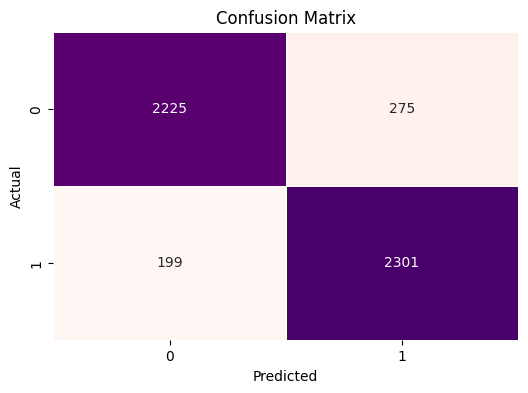

In [30]:
# Create a confusion matrix
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='RdPu', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
vocab_size = 20000
max_len    = 200

tok = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tok.fit_on_texts(x_train)

Xtr_seq = tok.texts_to_sequences(x_train)
Xva_seq = tok.texts_to_sequences(x_test)

# --- Pad and coerce dtype ---
x_train_pad = pad_sequences(Xtr_seq, maxlen=max_len, padding='post', truncating='post').astype('int32')
x_val_pad= pad_sequences(Xva_seq, maxlen=max_len, padding='post', truncating='post').astype('int32')
y_train_pad= y_train.astype('float32')
y_val_pad= y_test.astype('float32')

print("Sequence shapes:", x_train_pad.shape, x_val_pad.shape)

Sequence shapes: (45000, 200) (5000, 200)


In [32]:

embedding_dim = 128


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Dense, Bidirectional, LSTM

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_len,), mask_zero=True),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1756936057.760003      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756936057.760639      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,995,841 (11.43 MB)

 Trainable params: 2,995,841 (11.43 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Creating an instance of EarlyStopping Callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'val_loss',          
    patience = 4,                  
    restore_best_weights = True    
)

early_stopping

In [34]:
history1 = model.fit(x_train_pad, y_train_pad, epochs = 20, batch_size = 32,
          validation_split = 0.2,
          callbacks = [early_stopping]
)

Epoch 1/20


I0000 00:00:1756936071.867222      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 767s 670ms/step - accuracy: 0.7734 - loss: 0.4542 - val_accuracy: 0.8804 - val_loss: 0.2904
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 756s 672ms/step - accuracy: 0.9218 - loss: 0.2150 - val_accuracy: 0.8740 - val_loss: 0.3103
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 756s 672ms/step - accuracy: 0.9495 - loss: 0.1460 - val_accuracy: 0.8821 - val_loss: 0.3301
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 751s 668ms/step - accuracy: 0.9728 - loss: 0.0805 - val_accuracy: 0.8723 - val_loss: 0.3878
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 759s 674ms/step - accuracy: 0.9834 - loss: 0.0507 - val_accuracy: 0.8689 - val_loss: 0.4556


In [40]:
val_pred_prob = model.predict(x_val_pad).ravel()
val_pred = (val_pred_prob >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
acc = accuracy_score(y_val_pad, val_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_val_pad, val_pred, average='weighted', zero_division=0)

print(f"BiLSTM — Acc:{acc:.4f}  Prec_w:{prec:.4f}  Rec_w:{rec:.4f}  F1_w:{f1:.4f}")
print(classification_report(y_val_pad, val_pred, target_names=['negative','positive']))

157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step
BiLSTM — Acc:0.8760  Prec_w:0.8764  Rec_w:0.8760  F1_w:0.8760
              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2500
    positive       0.89      0.86      0.87      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [41]:
val_pred_prob = model.predict(x_val_pad).ravel()
val_pred = (val_pred_prob >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
acc = accuracy_score(y_test, val_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, val_pred, average='weighted', zero_division=0)

print(f"BiLSTM — Acc:{acc:.4f}  Prec_w:{prec:.4f}  Rec_w:{rec:.4f}  F1_w:{f1:.4f}")
print(classification_report(y_test, val_pred, target_names=['negative','positive']))

157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 189ms/step
BiLSTM — Acc:0.8760  Prec_w:0.8764  Rec_w:0.8760  F1_w:0.8760
              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2500
    positive       0.89      0.86      0.87      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

